<function matplotlib.pyplot.show(close=None, block=None)>

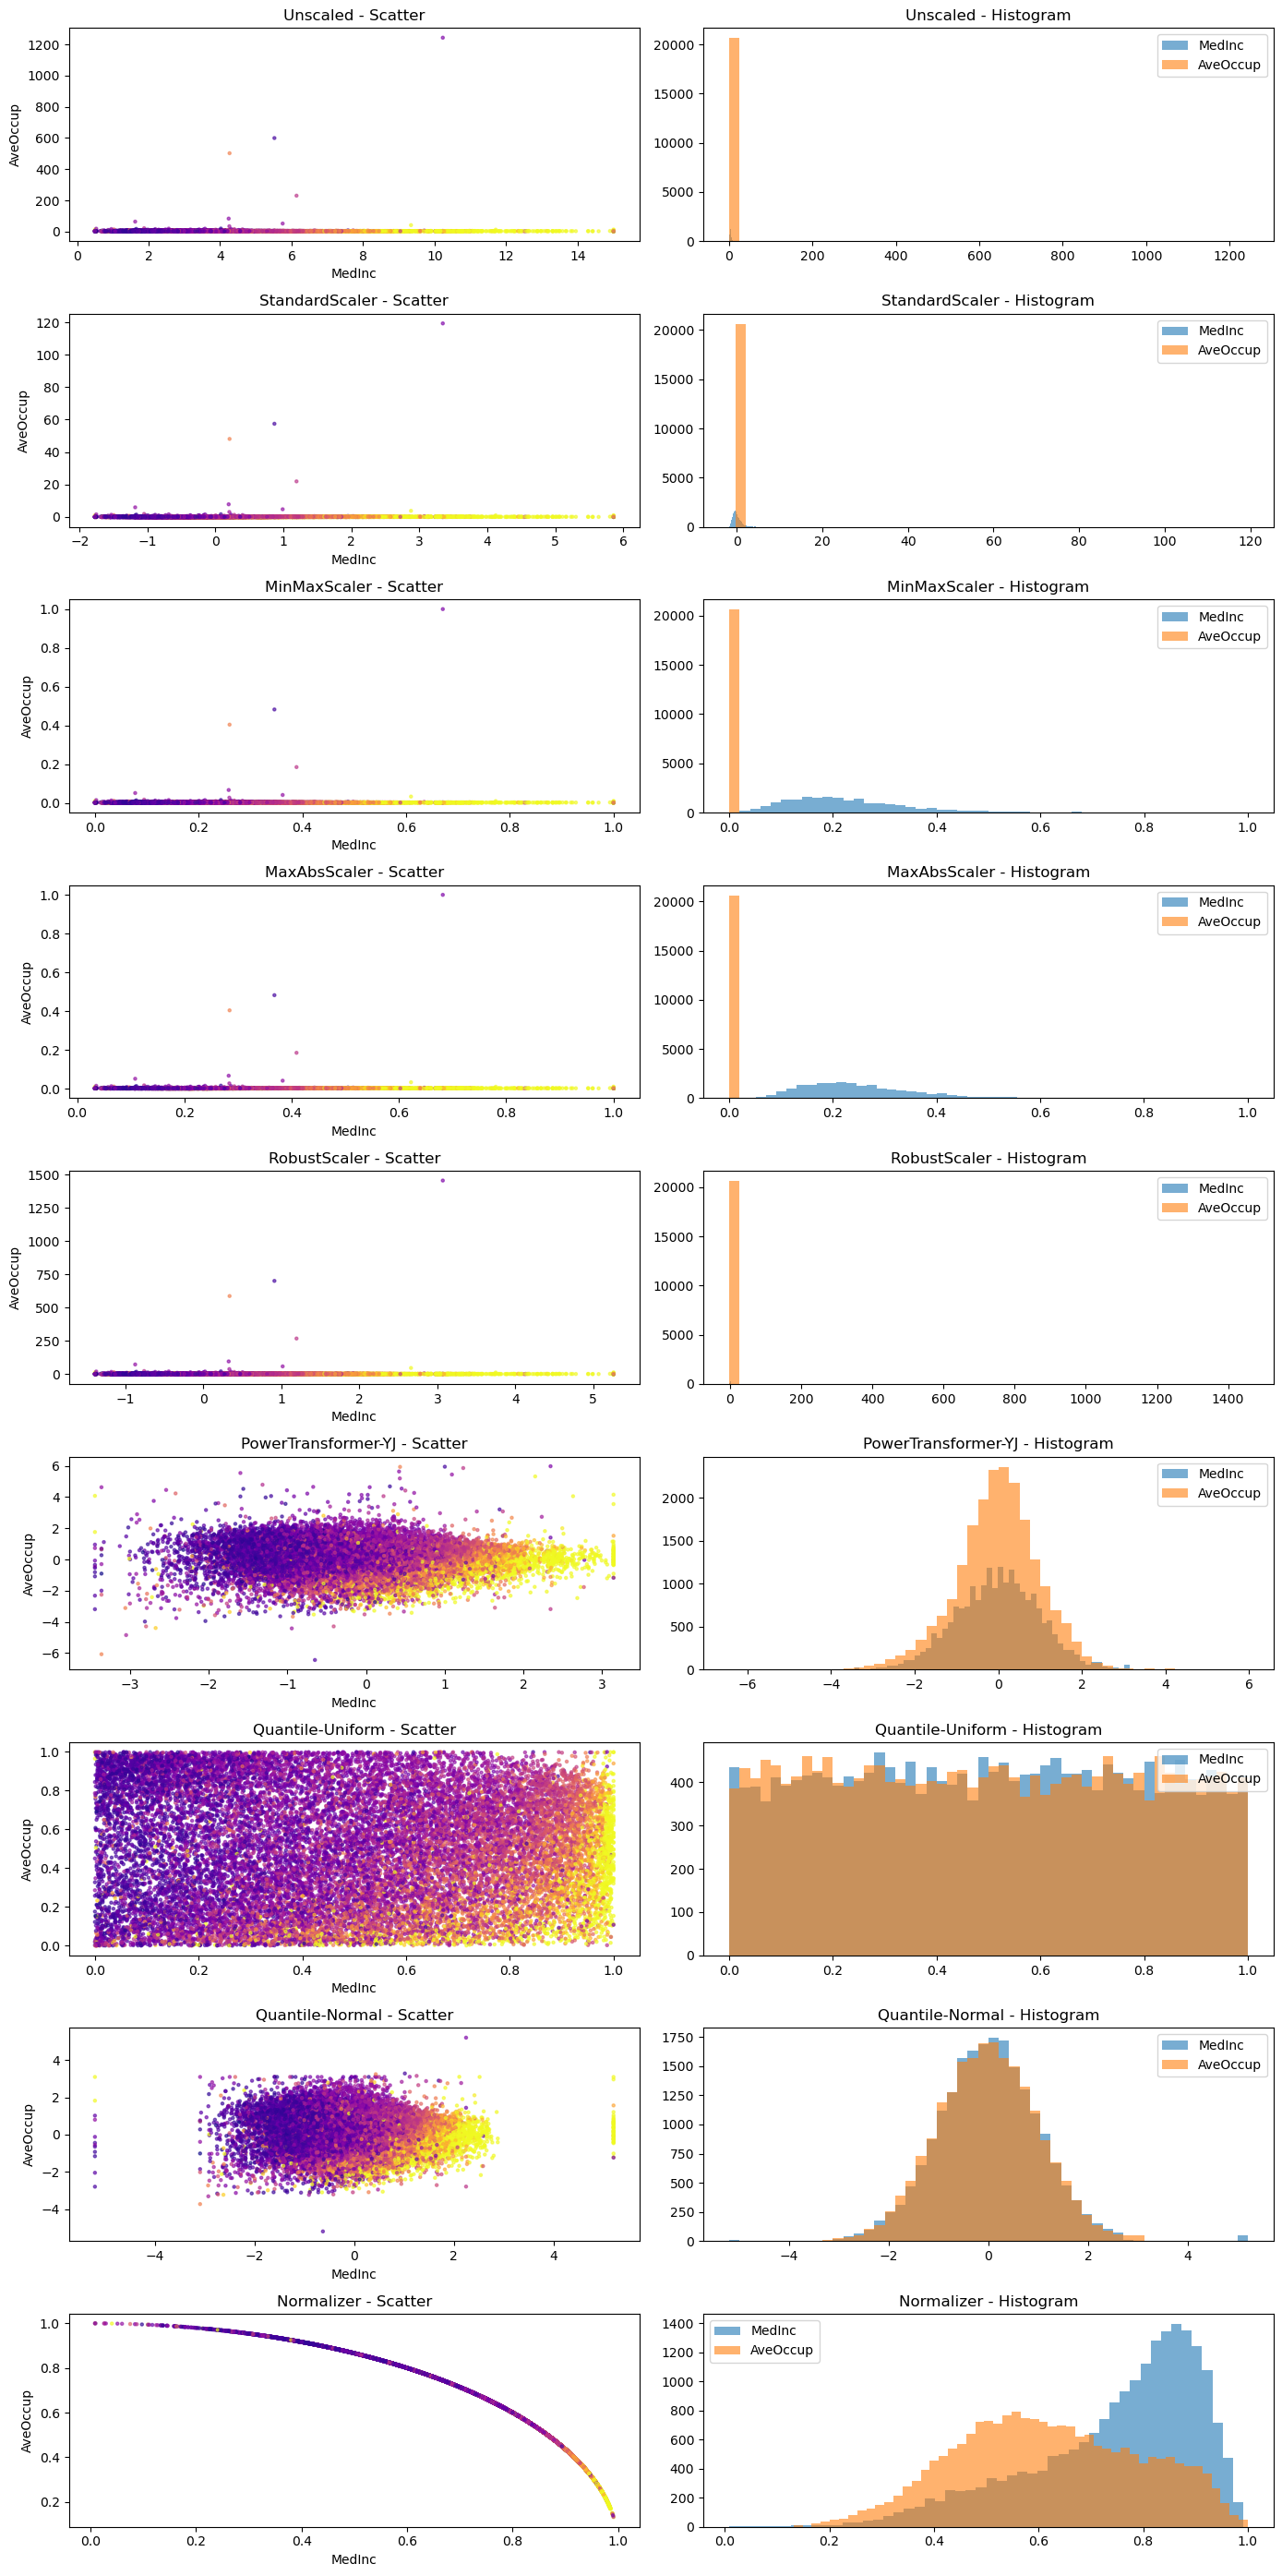

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, MaxAbsScaler,RobustScaler, PowerTransformer, QuantileTransformer, Normalizer
)

dataset = fetch_california_housing()
X_full, y = dataset.data, dataset.target
feature_names = dataset.feature_names

features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(f) for f in features]
X = X_full[:, features_idx]

y_scaled = (y - y.min()) / (y.max() - y.min())
cmap = cm.plasma

scalers = [
    ("Unscaled", X),
    ("StandardScaler", StandardScaler().fit_transform(X)),
    ("MinMaxScaler", MinMaxScaler().fit_transform(X)),
    ("MaxAbsScaler", MaxAbsScaler().fit_transform(X)),
    ("RobustScaler", RobustScaler().fit_transform(X)),
    ("PowerTransformer-YJ", PowerTransformer(method="yeo-johnson").fit_transform(X)),
    ("Quantile-Uniform", QuantileTransformer(output_distribution="uniform", random_state=0).fit_transform(X)),
    ("Quantile-Normal", QuantileTransformer(output_distribution="normal", random_state=0).fit_transform(X)),
    ("Normalizer", Normalizer().fit_transform(X)),
]

fig, axes = plt.subplots(len(scalers), 2, figsize=(14, 28))

for i, (title, X_trans) in enumerate(scalers):
    # Scatter plot 
    axes[i, 0].scatter(
        X_trans[:, 0], X_trans[:, 1],
        c=cmap(y_scaled), s=5, alpha=0.6
    )
    axes[i, 0]. set_title(f"{title} - Scatter")
    axes[i, 0]. set_xlabel(features[0])
    axes[i, 0]. set_ylabel(features[1])

    #histogram
    axes[i, 1].hist(X_trans[:, 0], bins=50, alpha=0.6,color="tab:blue", label=features[0])
    axes[i, 1].hist(X_trans[:, 1], bins=50, alpha=0.6, color="tab:orange", label=features[1])
    axes[i, 1].set_title(f"{title} - Histogram")
    axes[i, 1].legend()

plt.tight_layout()
plt.show